<a href="https://colab.research.google.com/github/nagmafarez/IDS-Assignment/blob/main/SLR_%26_MLR_Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [4]:
#Read the data
df = pd.read_csv("/content/Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Performing EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
#Check for missing values
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [7]:
#Summerizing the data
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Encoding Categorical Data

In [8]:
#Check for missing values in the 'State' column
df['State'].isnull().sum()

np.int64(0)

In [9]:
# Manually map the state names to numbers
df['State'] = df['State'].map({'New York': 1, 'California': 2, 'Florida': 3})

In [10]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [11]:
# Rename columns to remove spaces
df.columns = df.columns.str.replace(' ', '_')

In [12]:
# Display the updated column names to verify
df.columns

Index(['R&D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [13]:
# Rename the 'R&D_Spend' column to 'RnD_Spend'
df.rename(columns={'R&D_Spend': 'RnD_Spend'}, inplace=True)

# Verify the changes
print(df.columns)

Index(['RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')


Scaling Numerical Features

In [14]:
#RnD spend
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
df['RnD_Spend'] = Scaler.fit_transform(df[['RnD_Spend']])
df.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,2.016411,136897.80,471784.10,1,192261.83
1,1.955860,151377.59,443898.53,2,191792.06
2,1.754364,101145.55,407934.54,3,191050.39
3,1.554784,118671.85,383199.62,1,182901.99
4,1.504937,91391.77,366168.42,3,166187.94


In [15]:
#Administration
df['Administration'] = Scaler.fit_transform(df[['Administration']])
df.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,2.016411,0.560753,471784.10,1,192261.83
1,1.955860,1.082807,443898.53,2,191792.06
2,1.754364,-0.728257,407934.54,3,191050.39
3,1.554784,-0.096365,383199.62,1,182901.99
4,1.504937,-1.079919,366168.42,3,166187.94


In [16]:
#Marketing_Spend
df['Marketing_Spend'] = Scaler.fit_transform(df[['Marketing_Spend']])
df.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,2.016411,0.560753,2.153943,1,192261.83
1,1.955860,1.082807,1.923600,2,191792.06
2,1.754364,-0.728257,1.626528,3,191050.39
3,1.554784,-0.096365,1.422210,1,182901.99
4,1.504937,-1.079919,1.281528,3,166187.94


In [17]:
#Profit
df['Profit'] = Scaler.fit_transform(df[['Profit']])
df.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,2.016411,0.560753,2.153943,1,2.011203
1,1.955860,1.082807,1.923600,2,1.999430
2,1.754364,-0.728257,1.626528,3,1.980842
3,1.554784,-0.096365,1.422210,1,1.776627
4,1.504937,-1.079919,1.281528,3,1.357740


# Correlation Matrix

In [18]:
df.corr()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.037930,0.972900
Administration,0.241955,1.000000,-0.032154,0.003026,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.137777,0.747766
State,0.037930,0.003026,0.137777,1.000000,0.048471
Profit,0.972900,0.200717,0.747766,0.048471,1.000000


# Scatter Plot between variables along with Histograms

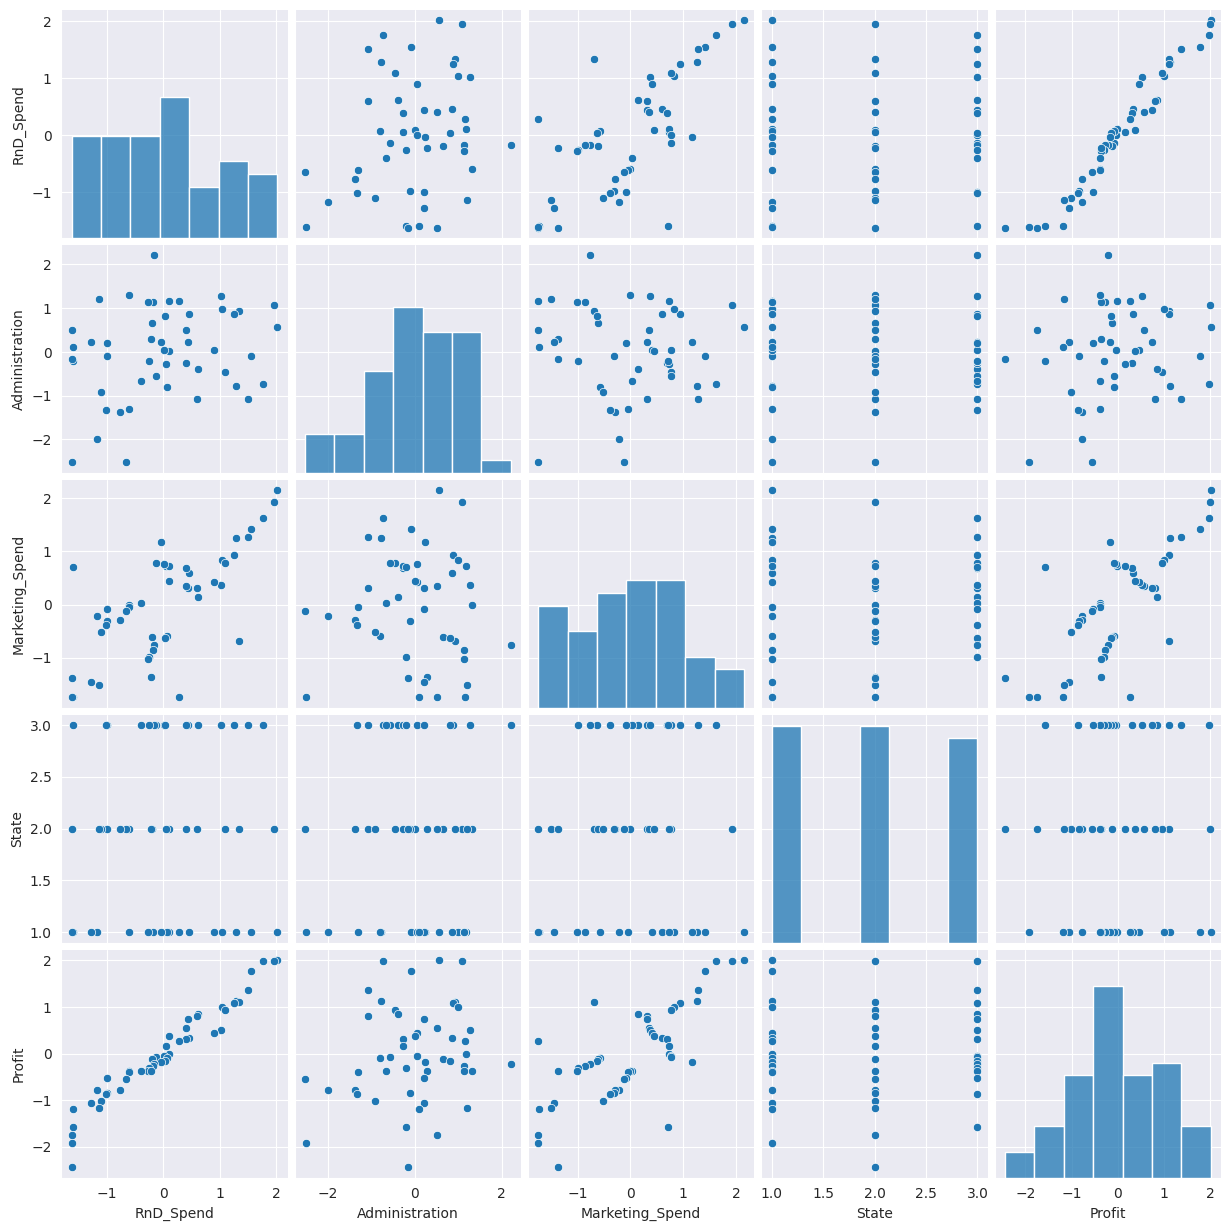

In [19]:
# Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Preparing a Model

In [30]:
#Build a Model
import statsmodels.formula.api as smf
model = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend', data = df).fit()

In [31]:
#Coefficients
model.params

,0
Intercept,-5.551115e-16
RnD_Spend,9.175798e-01
Administration,-1.864043e-02
Marketing_Spend,8.261087e-02


In [32]:
#t and p values
print(model.tvalues, '\n', model.pvalues)

Intercept         -1.696439e-14
RnD_Spend          1.784637e+01
Administration    -5.255068e-01
Marketing_Spend    1.655077e+00
dtype: float64 
 Intercept          1.000000e+00
RnD_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [33]:
#R Squared values
(model.rsquared,model.rsquared_adj)

(np.float64(0.9507459940683246), np.float64(0.9475337762901719))

# Simple Linear Regression Model

In [34]:
ml_r = smf.ols('Profit~RnD_Spend', data = df).fit()
#t and p values
print(ml_r.tvalues, '\n', ml_r.pvalues)

Intercept   -1.580123e-14
RnD_Spend    2.915114e+01
dtype: float64 
 Intercept    1.000000e+00
RnD_Spend    3.500322e-32
dtype: float64


In [35]:
ml_a = smf.ols('Profit~Administration', data = df).fit()
#t and p values
print(ml_a.tvalues, '\n', ml_a.pvalues)

Intercept        -3.729527e-15
Administration    1.419493e+00
dtype: float64 
 Intercept         1.000000
Administration    0.162217
dtype: float64


In [36]:
ml_m = smf.ols('Profit~Marketing_Spend', data = df).fit()
#t and p values
print(ml_m.tvalues, '\n', ml_m.pvalues)

Intercept         -5.502763e-15
Marketing_Spend    7.802657e+00
dtype: float64 
 Intercept          1.000000e+00
Marketing_Spend    4.381073e-10
dtype: float64


In [37]:
ml_ra = smf.ols('Profit~RnD_Spend+Administration', data = df).fit()
#t and p values
print(ml_ra.tvalues, '\n', ml_ra.pvalues)

Intercept        -1.582601e-14
RnD_Spend         2.858887e+01
Administration   -1.072677e+00
dtype: float64 
 Intercept         1.000000e+00
RnD_Spend         2.278348e-31
Administration    2.888932e-01
dtype: float64


In [38]:
ml_rm = smf.ols('Profit~RnD_Spend+Marketing_Spend', data = df).fit()
#t and p values
print(ml_rm.tvalues, '\n', ml_rm.pvalues)

Intercept         -1.624173e-14
RnD_Spend          1.926556e+01
Marketing_Spend    1.927052e+00
dtype: float64 
 Intercept          1.000000e+00
RnD_Spend          6.040433e-24
Marketing_Spend    6.003040e-02
dtype: float64


In [39]:
ml_am = smf.ols('Profit~Administration+Marketing_Spend', data = df).fit()
#t and p values
print(ml_am.tvalues, '\n', ml_am.pvalues)

Intercept         -5.787170e-15
Administration     2.467779e+00
Marketing_Spend    8.281039e+00
dtype: float64 
 Intercept          1.000000e+00
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


# Calculating VIF

In [42]:
rsq_r = smf.ols('RnD_Spend~Administration+Marketing_Spend' ,data = df).fit().rsquared
vif_r = 1/(1-rsq_r)

rsq_a = smf.ols('Administration~RnD_Spend+Marketing_Spend' ,data = df).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols('Marketing_Spend~RnD_Spend+Administration' ,data = df).fit().rsquared
vif_m = 1/(1-rsq_m)


# Storing vif values in a data frame
d1 = {'Variables':['RnD_Spend','Administration','Marketing_Spend'],'VIF':[vif_r,vif_a,vif_m]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RnD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


# Residual Analysis

# *Test for Normality of Residuals (Q-Q plot)*

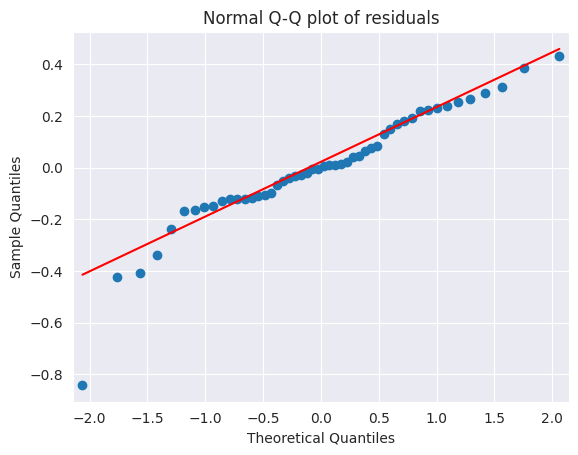

In [44]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [46]:
list(np.where(model.resid>0.5))

[array([], dtype=int64)]

Residual Plot for Homoscedasticity

In [47]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

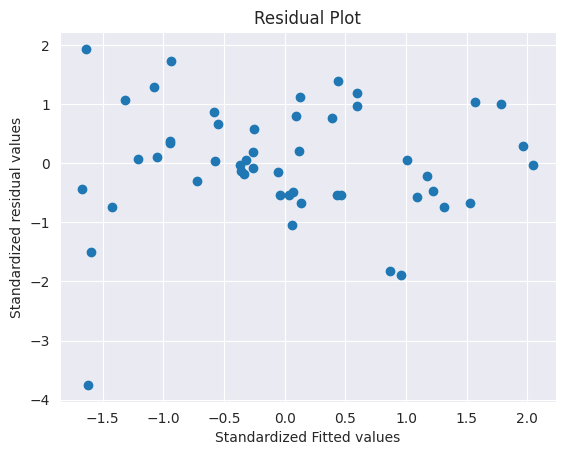

In [48]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

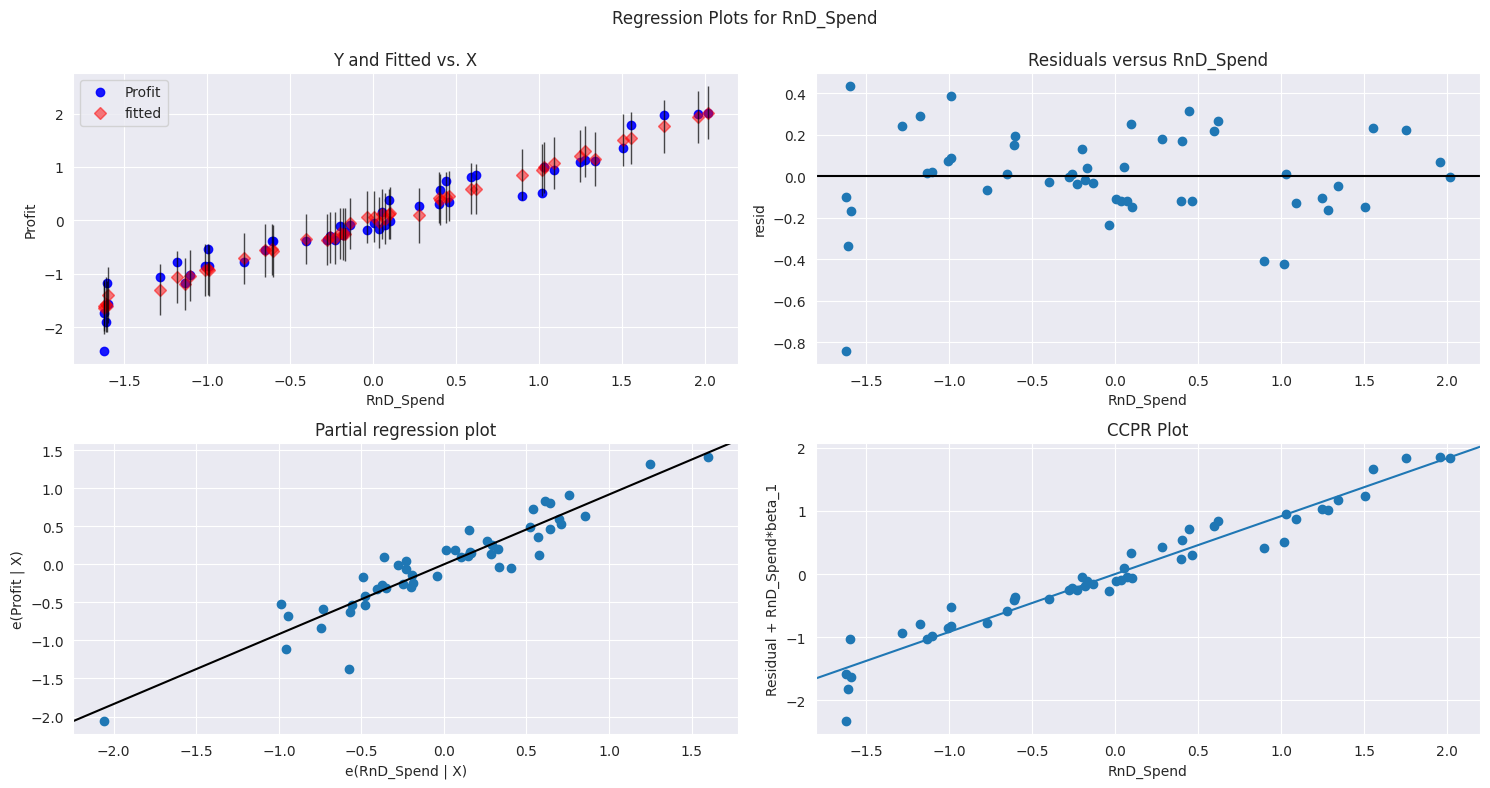

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnD_Spend", fig=fig)
plt.show()

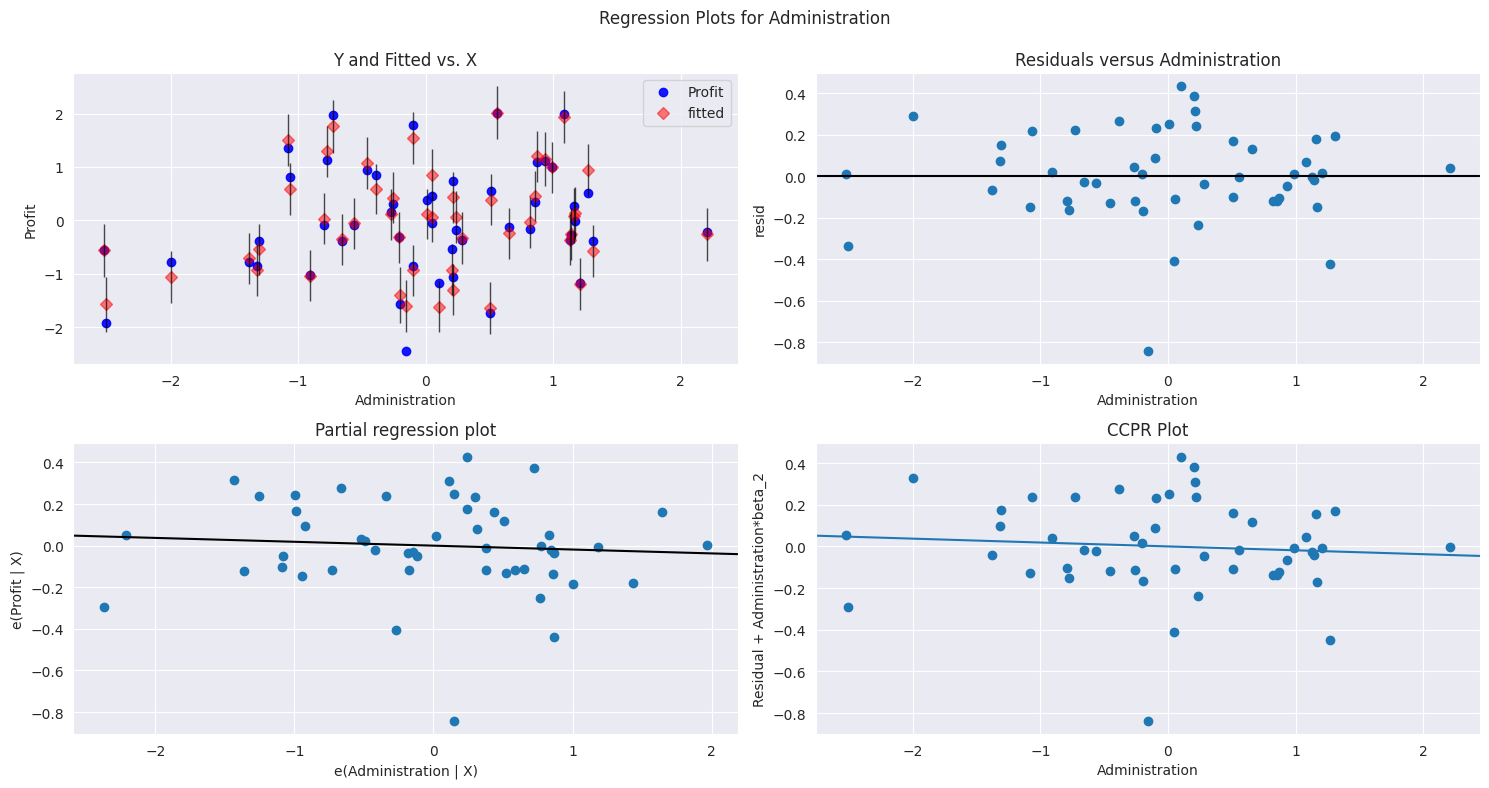

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

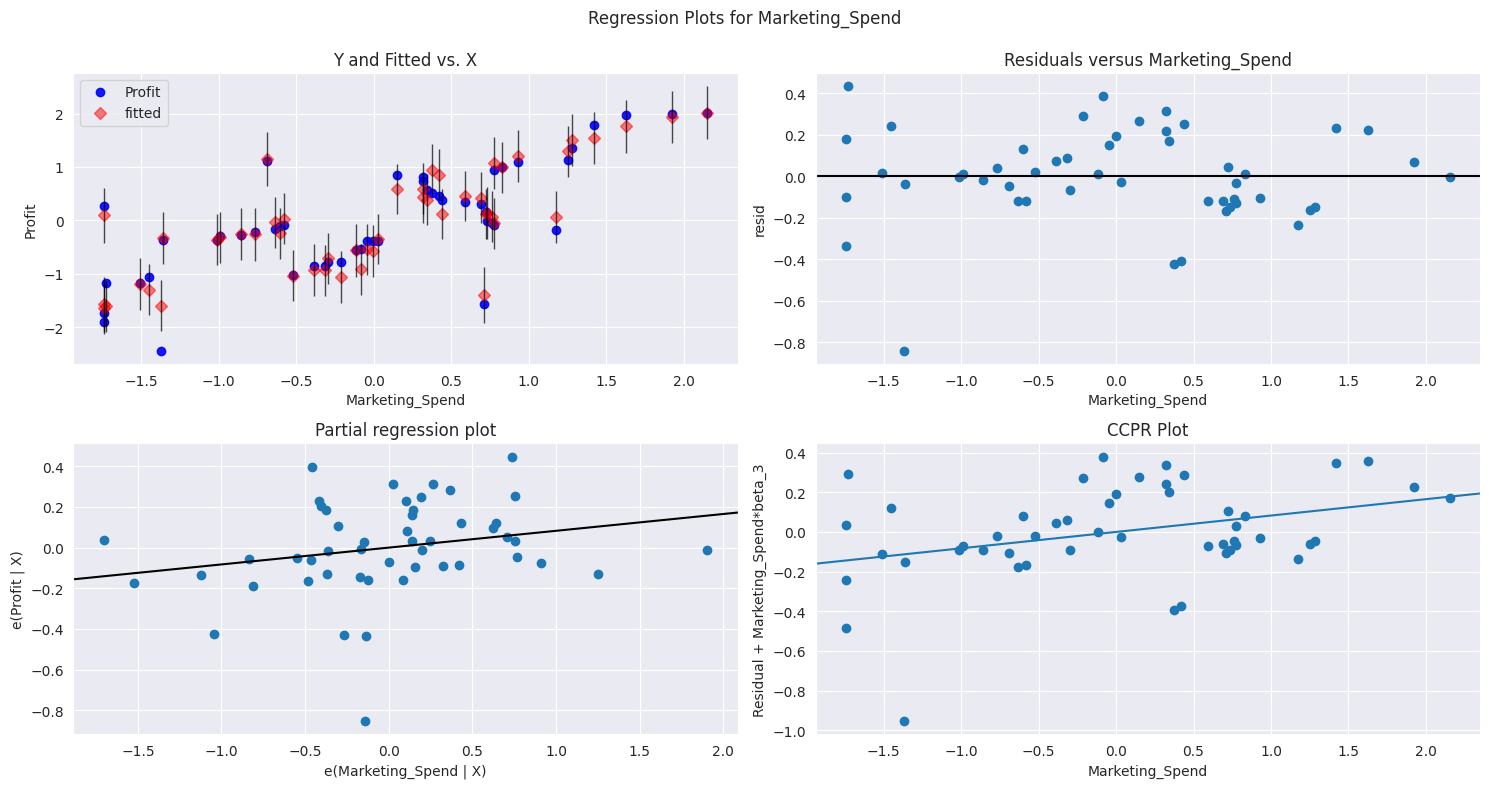

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics

Detecting Influencers/Outliers

# Cook’s Distance



In [52]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

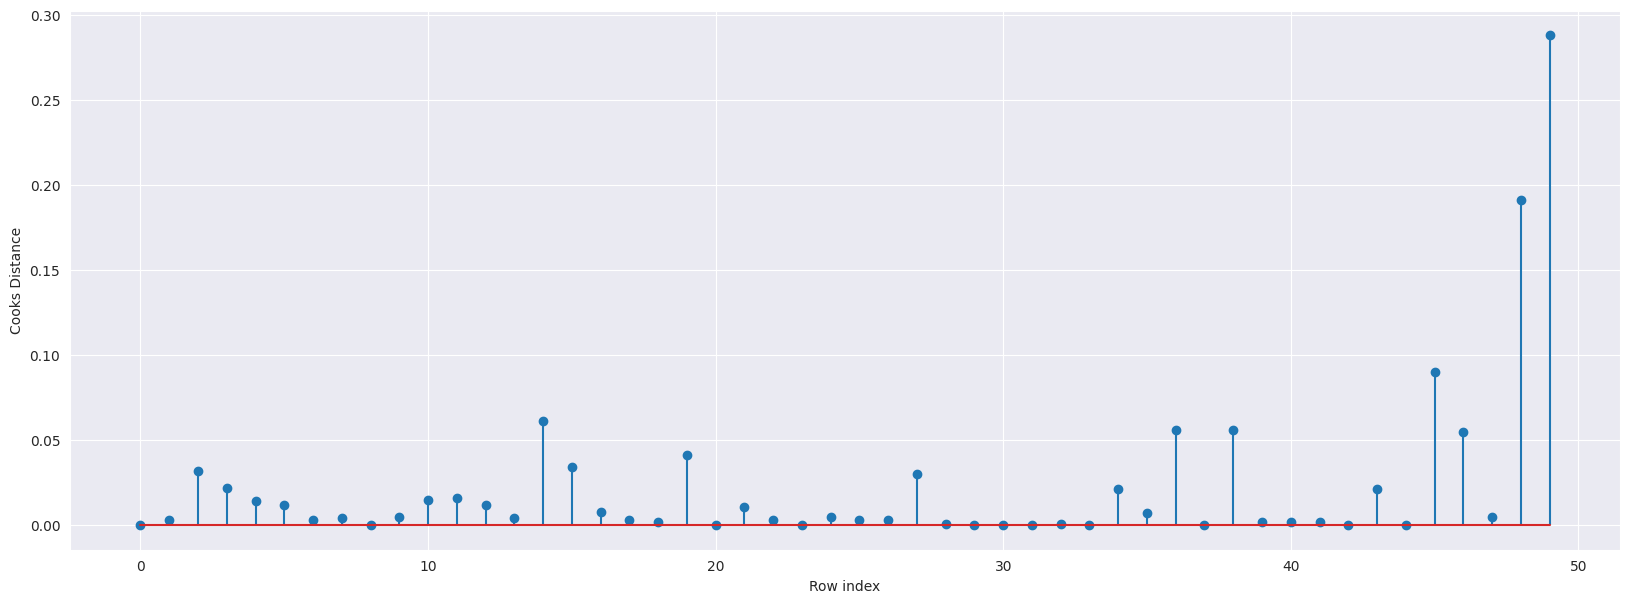

In [54]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(np.int64(49), np.float64(0.2880822927543273))

# High Influence Points

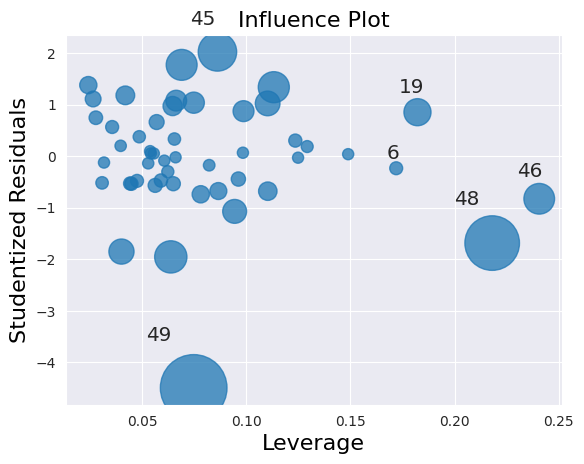

In [56]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [59]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

From the above plot, it is evident that data points 49,48,45 and 46 are the influencers

In [60]:
df[df.index.isin([49, 48, 45, 46])]

,RnD_Spend,Administration,Marketing_Spend,State,Profit
45,-1.600350,0.101254,-1.727400,1,-1.180082
46,-1.593413,-0.199322,0.711122,3,-1.566922
48,-1.610433,-2.509409,-1.743127,1,-1.913212
49,-1.622362,-0.157226,-1.369985,2,-2.439313


In [63]:
df.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,2.016411,0.560753,2.153943,1,2.011203
1,1.955860,1.082807,1.923600,2,1.999430
2,1.754364,-0.728257,1.626528,3,1.980842
3,1.554784,-0.096365,1.422210,1,1.776627
4,1.504937,-1.079919,1.281528,3,1.357740


# Improving the Model

In [66]:
#Load the data
df_new = pd.read_csv("/content/Startups.csv")

In [67]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new.drop(df_new.index[[45,46,49,48]],axis=0).reset_index()

In [68]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [80]:
# Apply the same column name changes to df1 as were applied to df
df1.columns = df1.columns.str.replace(' ', '_')  # Replace spaces with underscores
df1.rename(columns={'R&D_Spend': 'RnD_Spend'}, inplace=True) # Rename R&D_Spend to RnD_Spend

In [81]:
df1

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [71]:
#Exclude variable "RnD_Spend" and generate R-Squared and AIC values
final_ml_am= smf.ols('Profit~Administration+Marketing_Spend',data = df).fit()

In [72]:
(final_ml_am.rsquared,final_ml_am.aic,final_ml_am.bic)

(np.float64(0.6097229746770663),
 np.float64(100.84892978664773),
 np.float64(106.58499880293216))

In [73]:
#Exclude variable "Administration" and generate R-Squared and AIC values
final_ml_rm= smf.ols('Profit~RnD_Spend+Marketing_Spend',data = df).fit()

In [74]:
(final_ml_rm.rsquared,final_ml_rm.aic,final_ml_rm.bic)

(np.float64(0.9504503015559763),
 np.float64(-2.3451018853936176),
 np.float64(3.39096713089082))

In [75]:
#Exclude variable "Marketing_Spend" and generate R-Squared and AIC values
final_ml_ra= smf.ols('Profit~RnD_Spend+Administration',data = df).fit()

In [76]:
(final_ml_ra.rsquared,final_ml_ra.aic,final_ml_ra.bic)

(np.float64(0.9478129385009173),
 np.float64(0.2478193795098349),
 np.float64(5.983888395794272))

Comparing above R-Square and AIC values, model 'final_ml_rm' and 'final_ml-ra', 'final_ml_rm' has high R- square and low AIC value hence include variable 'Marketing_Spend' so that multi collinearity problem would be resolved.

# Cook’s Distance



In [77]:
model_influence_r = final_ml_r.get_influence()
(c_r, _) = model_influence_r.cooks_distance

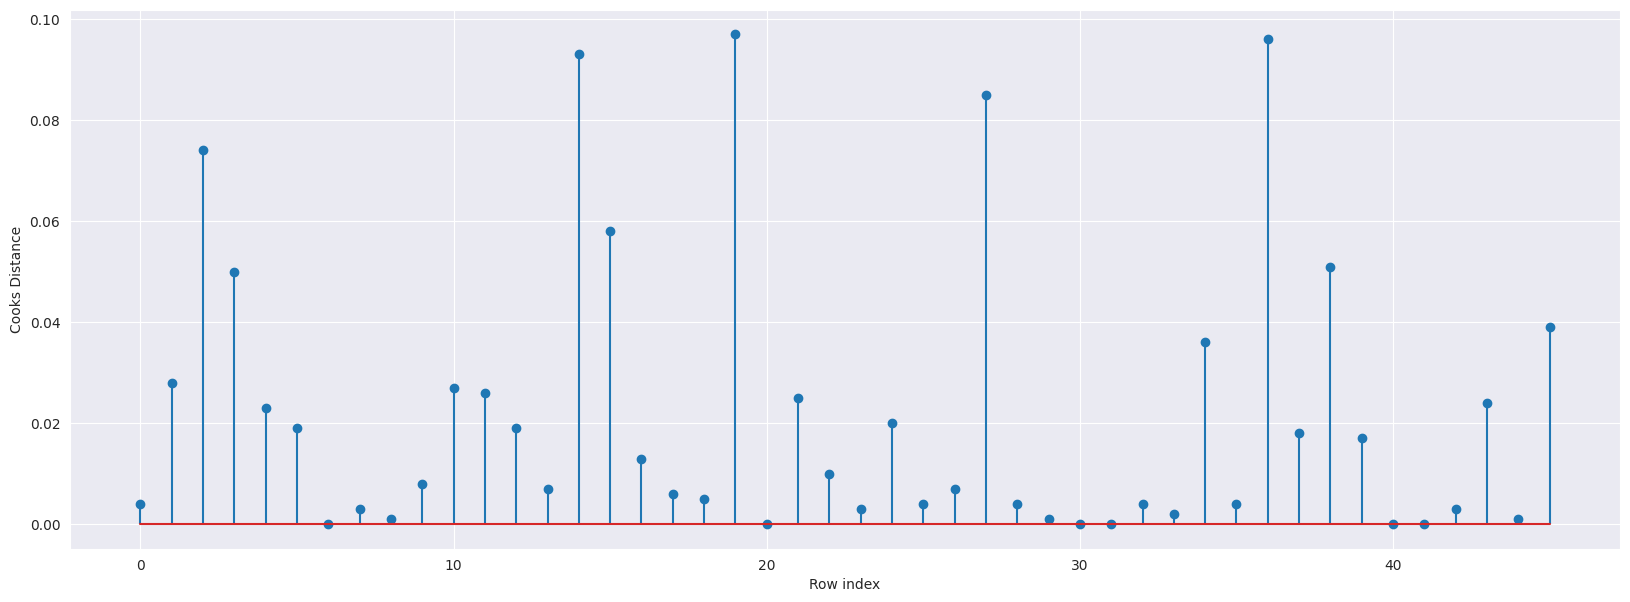

In [85]:
# Ensure c_r is calculated for the correct DataFrame (df1)
final_ml_r_df1 = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend', data=df1).fit()  # Fit the model to df1
model_influence_r_df1 = final_ml_r_df1.get_influence()
(c_r, _) = model_influence_r_df1.cooks_distance  # Recalculate Cook's distance

fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)), np.round(c_r, 3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [88]:
#index of the data points where c is more than .05
(np.argmax(c_r),np.max(c_r))

(np.int64(19), np.float64(0.09705035449315333))

In [90]:
#Drop 19  observations
df2=df1.drop(df1.index[[19]],axis=0)

In [91]:
df2

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [92]:
#Reset the index and re arrange the row values
df3=df2.reset_index()

In [93]:
df4=df3.drop(['index'],axis=1)

In [94]:
df4

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [95]:
#Build the model on the new data
final_ml_r= smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data = df4).fit()

In [96]:
#Again check for influencers
model_influence_r = final_ml_r.get_influence()
(c_r, _) = model_influence_r.cooks_distance

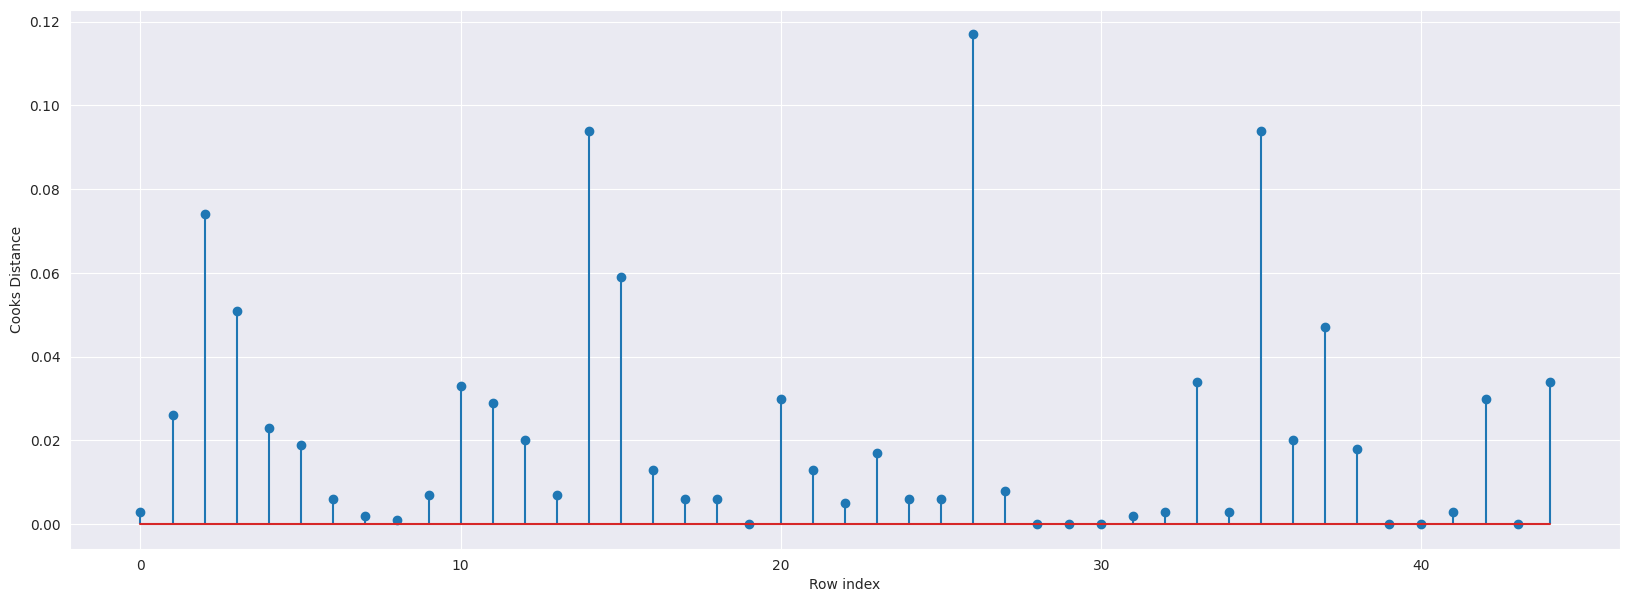

In [98]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_r,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [100]:
#index of the data points where c is more than .05
(np.argmax(c_r),np.max(c_r))

(np.int64(26), np.float64(0.11730559428099421))

*Since the value is <1 , we can stop the diagnostic process and finalize the model*

In [102]:
#Check the accuracy of the model
final_ml_r= smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data = df4).fit()

In [103]:
(final_ml_r.rsquared,final_ml_r.aic)

(np.float64(0.9638487279209415), np.float64(929.0199292013449))

# Predicting for new data

In [104]:
#New data for prediction
new_data=pd.DataFrame({"RnD_Spend":25000,"Administration":38000,"Marketing_Spend":50000,"State":"Florida"},index=[1])

In [105]:
final_ml_r.predict(new_data)

,0
1,74804.148998


In [111]:
# Apply necessary transformations to df_new
df_new.columns = df_new.columns.str.replace(' ', '_')
df_new.rename(columns={'R&D_Spend': 'RnD_Spend'}, inplace=True) # Rename R&D_Spend to RnD_Spend
# Assuming 'State' column needs to be encoded as done earlier
df_new['State'] = df_new['State'].map({'New York': 1, 'California': 2, 'Florida': 3})

final_ml_r.predict(df_new.iloc[0:5,])

,0
0,190494.269887
1,186652.713720
2,181137.968853
3,172477.246693
4,171615.096873


In [114]:
pred_y = final_ml_r.predict(df_new)

In [115]:
pred_y

,0
0,190494.269887
1,186652.713720
2,181137.968853
3,172477.246693
4,171615.096873
5,163325.785945
6,154495.974985
7,158309.498964
8,150338.735701
9,154344.605617
